In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df

# Plots
from src.analyses.fig_experiment import make_combined_figure_startdeviation_tardiness_earliness

In [21]:
df_experiments = pd.read_csv("experiments_v01.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization
0,B-1,0.25,1.00,0.75,0.1,1440,1,0,3,CP,0.75
1,B-2,0.25,0.75,0.75,0.1,1440,3,1,12,CP,0.75
2,B-3,0.25,0.50,0.75,0.1,1440,1,1,6,CP,0.75
3,B-4,0.25,0.25,0.75,0.1,1440,1,3,12,CP,0.75
4,B-5,0.25,0.00,0.75,0.1,1440,0,1,3,CP,0.75
...,...,...,...,...,...,...,...,...,...,...,...
175,R-125,1.00,1.00,0.95,0.3,1440,1,0,0,CP,0.95
176,R-126,1.00,0.75,0.95,0.3,1440,3,1,0,CP,0.95
177,R-127,1.00,0.50,0.95,0.3,1440,1,1,0,CP,0.95
178,R-128,1.00,0.25,0.95,0.3,1440,1,3,0,CP,0.95


In [22]:
df_schedules = pd.read_csv("schedules_v01.csv")
df_schedules

,Job,Routing_ID,Experiment_ID,Arrival,Ready Time,Due Date,Shift,Operation,Machine,Original Duration,Start,End,max_utilization
0,01-07500-0000,01-07,B-1,0,1440,3405,1,0,M02,31,2130,2161,0.75
1,01-07500-0000,01-07,B-2,0,1440,3405,1,0,M02,31,2133,2164,0.75
2,01-07500-0000,01-07,B-3,0,1440,3405,1,0,M02,31,1762,1793,0.75
3,01-07500-0000,01-07,B-4,0,1440,3405,1,0,M02,31,2150,2181,0.75
4,01-07500-0000,01-07,B-5,0,1440,3405,1,0,M02,31,1810,1841,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014397,01-09500-0460,01-03,R-125,31544,31680,34164,22,9,M05,43,33513,33556,0.95
1014398,01-09500-0460,01-03,R-126,31544,31680,34164,22,9,M05,43,34121,34164,0.95
1014399,01-09500-0460,01-03,R-127,31544,31680,34164,22,9,M05,43,34121,34164,0.95
1014400,01-09500-0460,01-03,R-128,31544,31680,34164,22,9,M05,43,34121,34164,0.95


In [23]:
df_dev = pd.read_csv("experiment_shift_dev_v01.csv")
df_dev

,Experiment_ID,Shift,Deviation,Pairs
0,B-1,2,55.400000,20
1,B-1,3,85.100000,20
2,B-1,4,86.272727,55
3,B-1,5,33.097561,82
4,B-1,6,17.619048,21
...,...,...,...,...
3775,R-99,18,16.904762,42
3776,R-99,19,58.253165,79
3777,R-99,20,46.968750,32
3778,R-99,21,99.734694,98


In [24]:
df_metrics = jobs_metrics_from_operations_df(df_schedules)
df_metrics

,Job,Routing_ID,Experiment_ID,Shift,Arrival,Due Date,Completion,Tardiness,Earliness,Lateness
0,01-07500-0000,01-07,B-1,1,0,3405,3068,0,337,-337
1,01-07500-0001,01-06,B-1,1,60,2433,2374,0,59,-59
2,01-07500-0002,01-01,B-1,1,142,2766,2427,0,339,-339
3,01-07500-0003,01-05,B-1,1,197,2640,2262,0,378,-378
4,01-07500-0004,01-04,B-1,1,249,3581,3078,0,503,-503
...,...,...,...,...,...,...,...,...,...,...
74455,01-08500-0409,01-07,R-99,22,31539,33765,33942,177,0,177
74456,01-08500-0410,01-09,R-99,22,31589,33041,33622,581,0,581
74457,01-08500-0411,01-03,R-99,22,31599,33608,33608,0,0,0
74458,01-08500-0412,01-06,R-99,22,31620,33025,33712,687,0,687


In [25]:
def get_experiment_string(df, experiment_id):
    row = df[df["Experiment_ID"] == experiment_id].iloc[0]
    return (
        f"Experiment {experiment_id}\n"
        f"lateness/deviation = {row['Abs Lateness Ratio']:.2f}, "
        f"tardiness/earliness = {row['Inner Tardiness Ratio']:.2f}, "
        f"bottleneck utilization = {row['Max Bottleneck Utilization']:.2f} "
        f"(sigma = {row['Sim Sigma']:.2f})"
    )

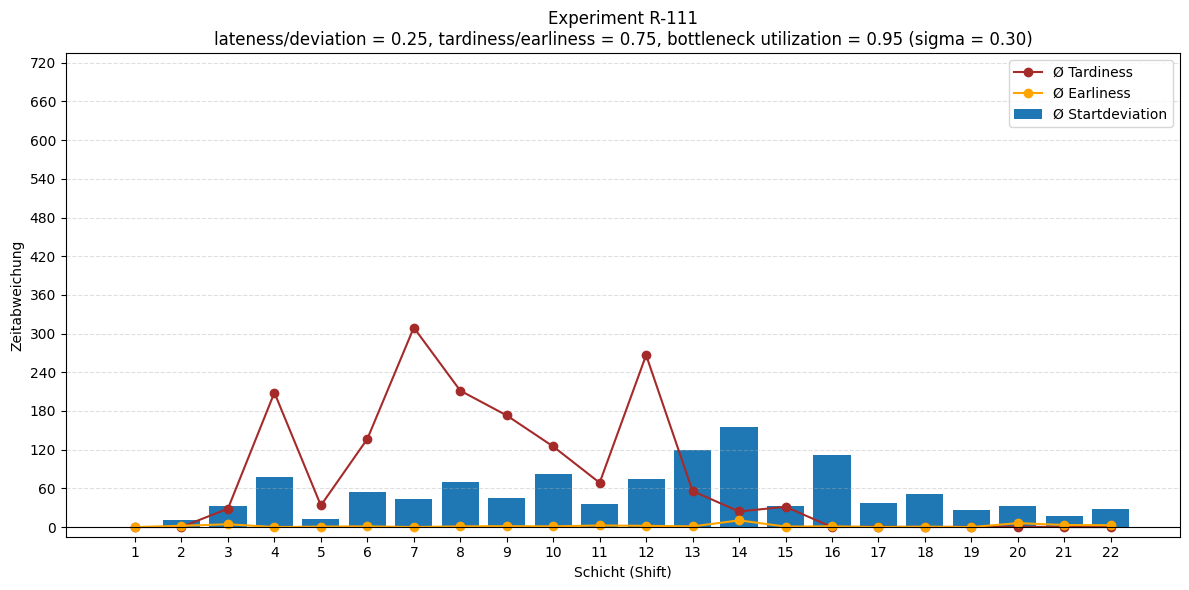

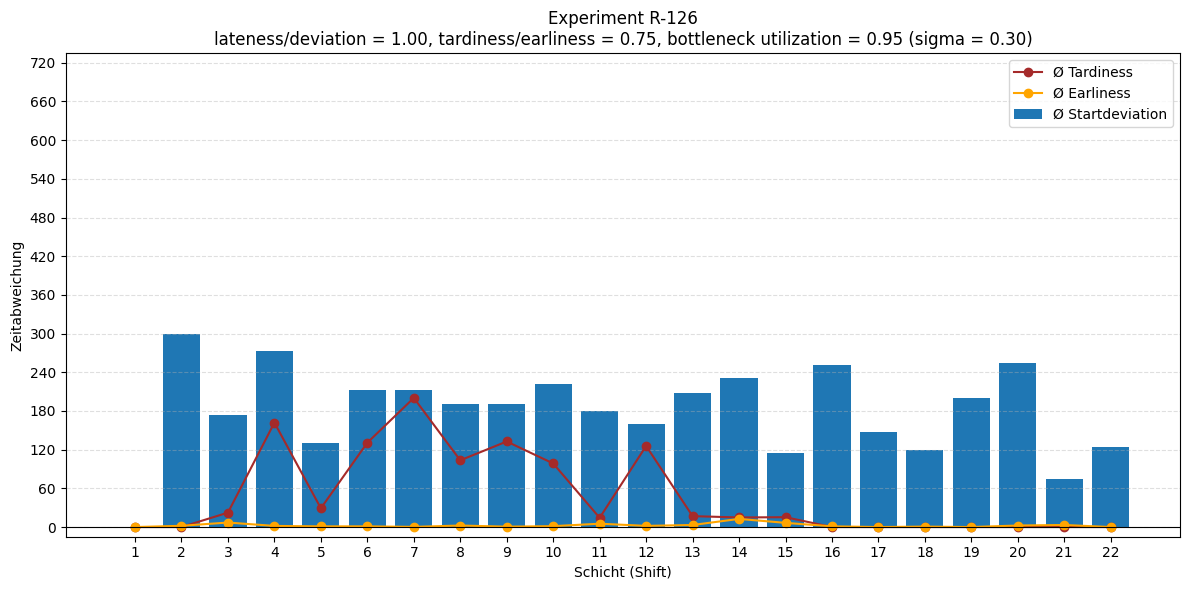

In [26]:
plt.show()
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"].isin([0.25, 1])) &
    (df_experiments["Inner Tardiness Ratio"] == 0.75) &
    (df_experiments["Max Bottleneck Utilization"] == 0.95) &
    (df_experiments["Sim Sigma"].isin([0.3]))
    ]

experiment_ids = df_experiments_filtered["Experiment_ID"].tolist()

for experiment_id in experiment_ids:
    make_combined_figure_startdeviation_tardiness_earliness(
        df_dev=df_dev,
        df_metrics=df_metrics,
        experiment_id=experiment_id,
        y_step=60,
        y_max=720,
        title=f"{get_experiment_string(df_experiments, experiment_id)}"
    )
    plt.show()

In [27]:
from src.utils.analysis.DataFrameEvaluation import get_kendall_tau_experiment_shift_df

df_kendall = get_kendall_tau_experiment_shift_df(
    df_schedules
)
df_kendall


,Experiment_ID,Shift,Kendall_Tau
0,B-1,2,0.733333
1,B-1,3,0.893334
2,B-1,4,0.806854
3,B-1,5,0.973989
4,B-1,6,1.000000
...,...,...,...
3775,R-99,18,0.992857
3776,R-99,19,0.887231
3777,R-99,20,0.963333
3778,R-99,21,0.837396


In [28]:
import matplotlib.pyplot as plt

def plot_kendall_tau_by_shift(df_kendall: pd.DataFrame, experiment_id: str):
    """
    Plottet Kendall's Tau über die Shifts für ein gegebenes Experiment_ID.
    """
    # Filtern und sortieren
    df_plot = df_kendall[df_kendall["Experiment_ID"] == experiment_id].copy()
    df_plot = df_plot.sort_values("Shift")

    plt.figure(figsize=(8, 4))
    plt.plot(df_plot["Shift"], df_plot["Kendall_Tau"], marker='o', linestyle='-', color='C0')
    plt.title(f"Kendall's Tau über Shifts – Experiment {experiment_id}")
    plt.xlabel("Shift")
    plt.ylabel("Kendall's Tau")
    plt.ylim(-1.05, 1.05)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


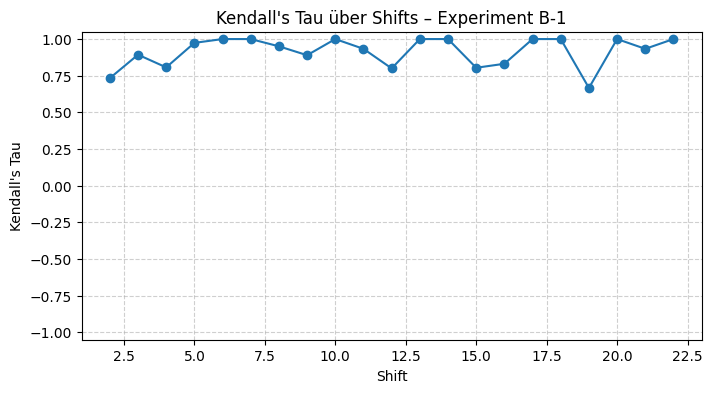

In [29]:
plot_kendall_tau_by_shift(df_kendall, experiment_id="B-1")


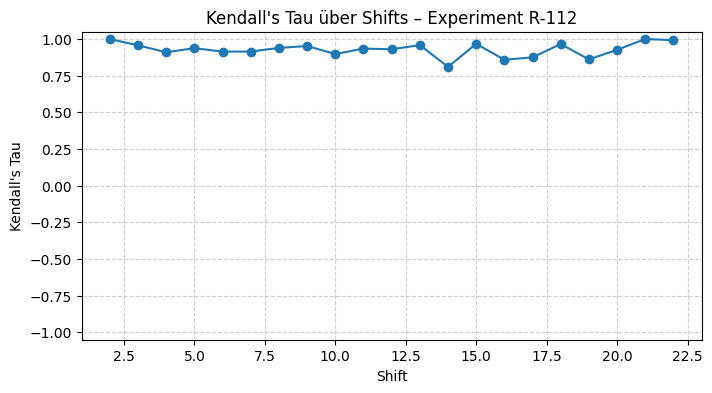

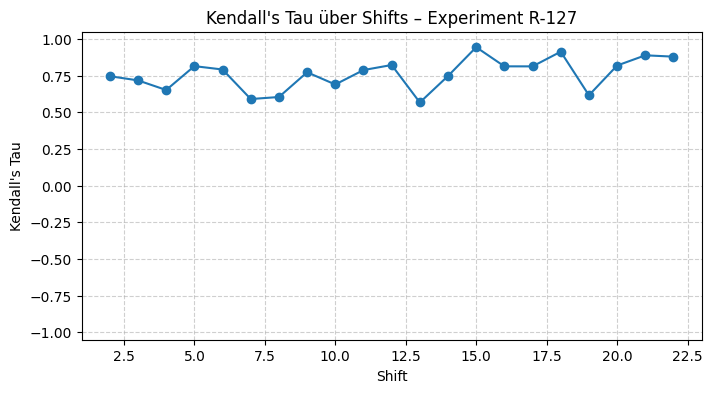

In [30]:
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"].isin([0.25, 1])) &
    (df_experiments["Inner Tardiness Ratio"] == 0.5) &
    (df_experiments["Max Bottleneck Utilization"] == 0.95) &
    (df_experiments["Sim Sigma"].isin([0.3]))
    ]

experiment_ids = df_experiments_filtered["Experiment_ID"].tolist()

for experiment_id in experiment_ids:
    plot_kendall_tau_by_shift(df_kendall, experiment_id=experiment_id)

In [31]:
df_kendall_mean = (
    df_kendall
    .groupby("Experiment_ID", dropna=False)["Kendall_Tau"]
    .mean()
    .reset_index()
    .rename(columns={"Kendall_Tau": "Mean_Kendall_Tau"})
)
df_kendall_mean

,Experiment_ID,Mean_Kendall_Tau
0,B-1,0.915091
1,B-10,0.987609
2,B-11,0.914466
3,B-12,0.990585
4,B-13,0.956304
...,...,...
175,R-95,0.810127
176,R-96,0.889531
177,R-97,0.859063
178,R-98,0.892919


In [32]:
# 1️⃣ Mittelwert je Experiment berechnen
df_kendall_mean = (
    df_kendall
    .groupby("Experiment_ID", dropna=False)["Kendall_Tau"]
    .mean()
    .reset_index()
    .rename(columns={"Kendall_Tau": "Mean_Kendall_Tau"})
)

# 2️⃣ Mit df_experimente zusammenführen
df_experiments = df_experiments.merge(df_kendall_mean, on="Experiment_ID", how="left")

df_experiments


,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization,Mean_Kendall_Tau
0,B-1,0.25,1.00,0.75,0.1,1440,1,0,3,CP,0.75,0.915091
1,B-2,0.25,0.75,0.75,0.1,1440,3,1,12,CP,0.75,0.987228
2,B-3,0.25,0.50,0.75,0.1,1440,1,1,6,CP,0.75,0.971791
3,B-4,0.25,0.25,0.75,0.1,1440,1,3,12,CP,0.75,0.990386
4,B-5,0.25,0.00,0.75,0.1,1440,0,1,3,CP,0.75,0.977324
...,...,...,...,...,...,...,...,...,...,...,...,...
175,R-125,1.00,1.00,0.95,0.3,1440,1,0,0,CP,0.95,0.738511
176,R-126,1.00,0.75,0.95,0.3,1440,3,1,0,CP,0.95,0.771098
177,R-127,1.00,0.50,0.95,0.3,1440,1,1,0,CP,0.95,0.762085
178,R-128,1.00,0.25,0.95,0.3,1440,1,3,0,CP,0.95,0.728353


In [33]:
# Nur numerische Spalten auswählen
corr = df_experiments.select_dtypes(include="number").corr()

# Fokus auf Kendall Tau
kendall_corr = corr["Mean_Kendall_Tau"].sort_values(ascending=False)
display(kendall_corr)


Mean_Kendall_Tau              1.000000
w_dev                         0.423570
w_e                           0.224120
w_t                           0.149519
Max Bottleneck Utilization   -0.050037
max_utilization              -0.050037
Inner Tardiness Ratio        -0.077834
Sim Sigma                    -0.418925
Abs Lateness Ratio           -0.582352
Shift Length                       NaN
Name: Mean_Kendall_Tau, dtype: float64

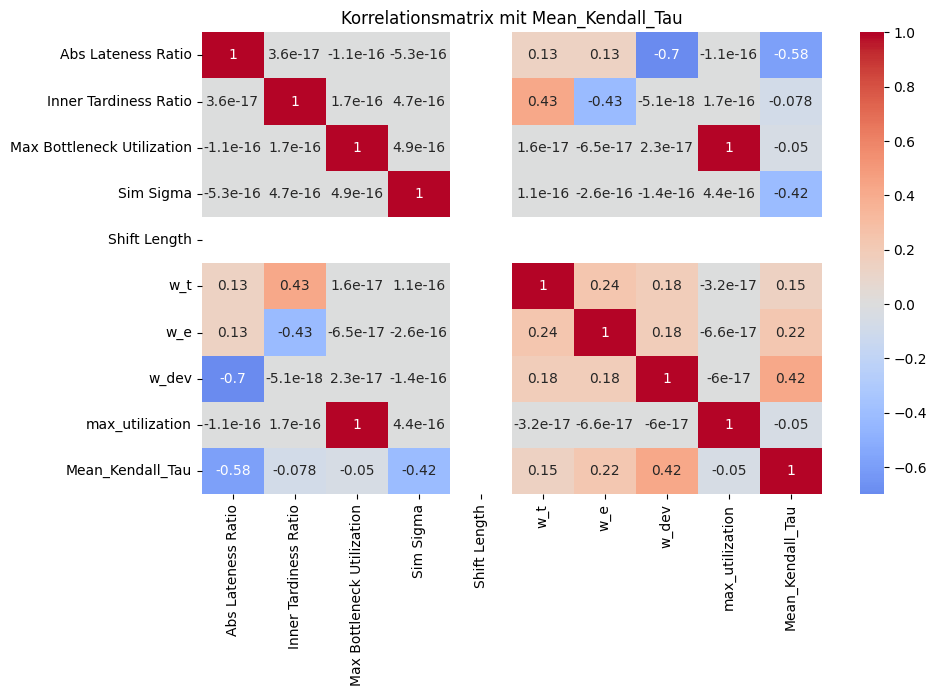

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Korrelationsmatrix mit Mean_Kendall_Tau")
plt.show()


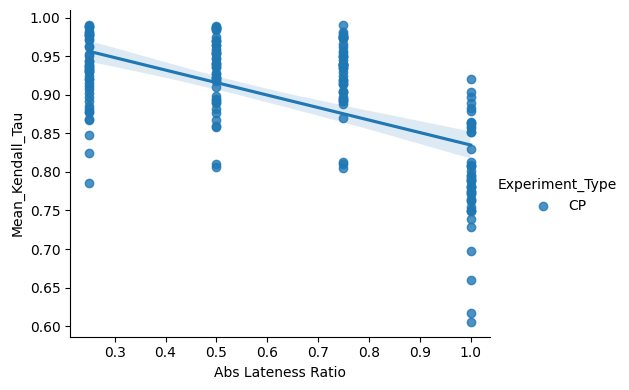

In [35]:
sns.lmplot(
    data=df_experiments,
    x="Abs Lateness Ratio",
    y="Mean_Kendall_Tau",
    hue="Experiment_Type",
    height=4,
    aspect=1.3
)



In [36]:
df_grouped = (
    df_experiments
    .groupby(["Abs Lateness Ratio", "Inner Tardiness Ratio", "Max Bottleneck Utilization"], as_index=False)
    ["Mean_Kendall_Tau"].mean()
)
display(df_grouped.head())


,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Mean_Kendall_Tau
0,0.25,0.00,0.75,0.942822
1,0.25,0.00,0.85,0.938236
2,0.25,0.00,0.95,0.959290
3,0.25,0.25,0.75,0.937540
4,0.25,0.25,0.85,0.927058


In [37]:
fig = px.scatter_3d(
    df_experiments,
    x="Abs Lateness Ratio",
    y="Inner Tardiness Ratio",
    z="Mean_Kendall_Tau",
    color="Max Bottleneck Utilization",
    symbol="Experiment_Type",
    size="w_dev",
    title="Planstabilität in Abhängigkeit von Lateness, Tardiness und Bottleneck"
)

filename = f"kendall_tau_3d.html"

# Speichern
fig.write_html(filename, include_plotlyjs="cdn")

fig.show()


In [38]:
import plotly.express as px

fig = px.scatter_3d(
    df_experiments,
    x="Abs Lateness Ratio",
    y="Inner Tardiness Ratio",
    z="Mean_Kendall_Tau",
    color="Max Bottleneck Utilization",
    size="Sim Sigma",  # optional – zeigt Streuung oder Unsicherheit
    title="Planstabilität in Abhängigkeit von Lateness, Tardiness, Bottleneck und Sigma",
    template="plotly_white"
)

fig.update_layout(
    scene=dict(
        xaxis_title="Abs Lateness Ratio",
        yaxis_title="Inner Tardiness Ratio",
        zaxis_title="Mean Kendall’s Tau"
    ),
    legend_title_text="Max Bottleneck Utilization",
)

fig.show()


In [39]:
import plotly.express as px

fig = px.scatter_3d(
    df_experiments,
    x="Abs Lateness Ratio",
    y="Inner Tardiness Ratio",
    z="Mean_Kendall_Tau",  # <-- Zielwert!
    color="Max Bottleneck Utilization",
    size="Sim Sigma",
    title="Zielwert: Mean Kendall’s Tau in Abhängigkeit der Parameter",
    template="plotly_white"
)

fig.update_layout(
    scene=dict(
        xaxis_title="Abs Lateness Ratio",
        yaxis_title="Inner Tardiness Ratio",
        zaxis_title="Mean Kendall’s Tau"
    ),
    legend_title_text="Max Bottleneck Utilization",
)
fig.show()


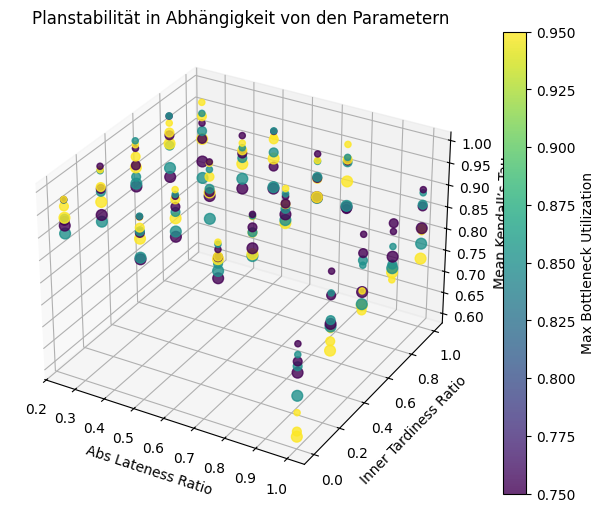

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    df_experiments["Abs Lateness Ratio"],
    df_experiments["Inner Tardiness Ratio"],
    df_experiments["Mean_Kendall_Tau"],
    c=df_experiments["Max Bottleneck Utilization"],
    s=df_experiments["Sim Sigma"] * 200,
    cmap="viridis",
    alpha=0.8
)

ax.set_xlabel("Abs Lateness Ratio")
ax.set_ylabel("Inner Tardiness Ratio")
ax.set_zlabel("Mean Kendall’s Tau")
ax.set_title("Planstabilität in Abhängigkeit von den Parametern")

fig.colorbar(sc, ax=ax, label="Max Bottleneck Utilization")
plt.show()


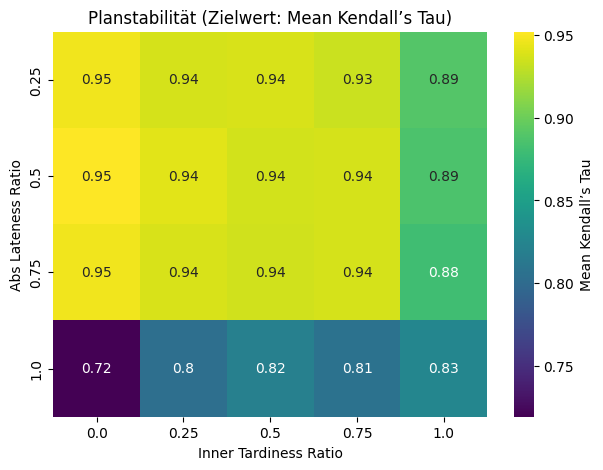

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
pivot = df_experiments.pivot_table(
    index="Abs Lateness Ratio",
    columns="Inner Tardiness Ratio",
    values="Mean_Kendall_Tau",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Kendall’s Tau'})
plt.title("Planstabilität (Zielwert: Mean Kendall’s Tau)")
plt.xlabel("Inner Tardiness Ratio")
plt.ylabel("Abs Lateness Ratio")
plt.show()


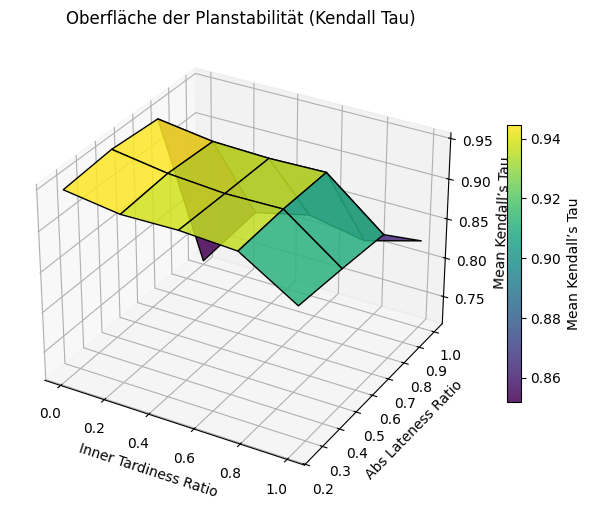

In [45]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pivot = df_experiments.pivot_table(
    index="Abs Lateness Ratio",
    columns="Inner Tardiness Ratio",
    values="Mean_Kendall_Tau",
    aggfunc="mean"
).sort_index(axis=0).sort_index(axis=1)

X, Y = np.meshgrid(pivot.columns, pivot.index)
Z = pivot.values

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.85)

ax.set_xlabel("Inner Tardiness Ratio")
ax.set_ylabel("Abs Lateness Ratio")
ax.set_zlabel("Mean Kendall’s Tau")
ax.set_title("Oberfläche der Planstabilität (Kendall Tau)")
fig.colorbar(surf, ax=ax, shrink=0.6, label="Mean Kendall’s Tau")
plt.show()


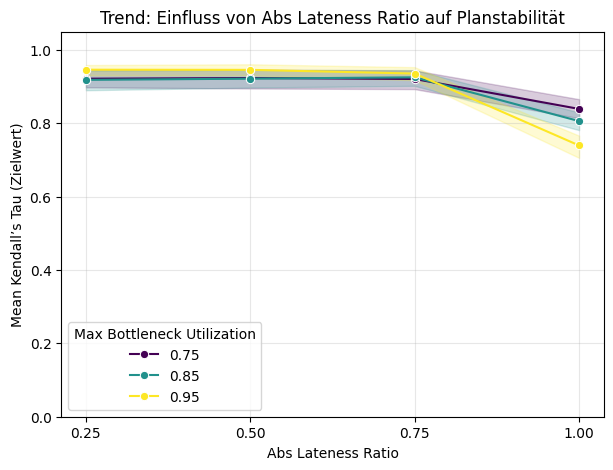

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.lineplot(
    data=df_experiments,
    x="Abs Lateness Ratio",
    y="Mean_Kendall_Tau",
    hue="Max Bottleneck Utilization",
    marker="o",
    dashes=False,
    palette="viridis"
)

plt.title("Trend: Einfluss von Abs Lateness Ratio auf Planstabilität")
plt.ylabel("Mean Kendall’s Tau (Zielwert)")
plt.xlabel("Abs Lateness Ratio")
plt.ylim(0, 1.05)
plt.grid(alpha=0.3)

# 👉 Nur tatsächliche Werte als Achsenticks
unique_vals = sorted(df_experiments["Abs Lateness Ratio"].unique())
plt.xticks(unique_vals)

plt.show()


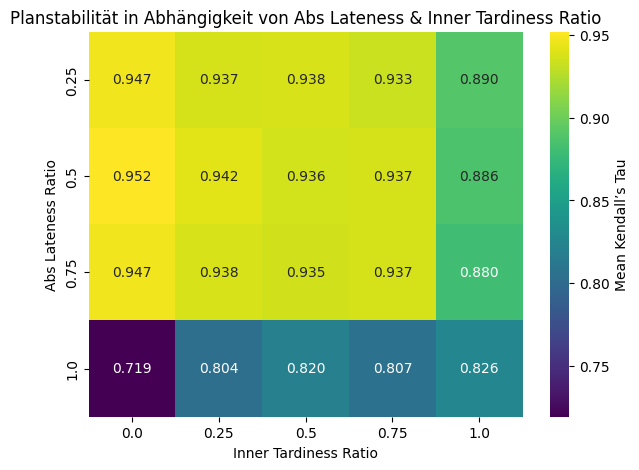

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

# Pivot-Tabelle für Heatmap
pivot = df_experiments.pivot_table(
    index="Abs Lateness Ratio",
    columns="Inner Tardiness Ratio",
    values="Mean_Kendall_Tau",
    aggfunc="mean"
)

sns.heatmap(
    pivot,
    annot=True,
    cmap="viridis",
    cbar_kws={'label': 'Mean Kendall’s Tau'},
    fmt=".3f"
)

plt.title("Planstabilität in Abhängigkeit von Abs Lateness & Inner Tardiness Ratio")
plt.xlabel("Inner Tardiness Ratio")
plt.ylabel("Abs Lateness Ratio")
plt.show()
